In [46]:
library('tidyverse')
library('tidymodels')
library('moderndive')
library('skimr')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.2.1     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



In [2]:
glimpse(evals)

Rows: 463
Columns: 14
$ ID           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ prof_ID      <int> 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, …
$ score        <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8, 4.…
$ age          <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40, 4…
$ bty_avg      <dbl> 5.000, 5.000, 5.000, 5.000, 3.000, 3.000, 3.000, 3.333, 3…
$ gender       <fct> female, female, female, female, male, male, male, male, m…
$ ethnicity    <fct> minority, minority, minority, minority, not minority, not…
$ language     <fct> english, english, english, english, english, english, eng…
$ rank         <fct> tenure track, tenure track, tenure track, tenure track, t…
$ pic_outfit   <fct> not formal, not formal, not formal, not formal, not forma…
$ pic_color    <fct> color, color, color, color, color, color, color, color, c…
$ cls_did_eval <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, 14, …
$ cls_students <in

In [4]:
evals_ch5 <- evals |> select(ID, score, bty_avg, age, gender)
glimpse(evals_ch5)

Rows: 463
Columns: 5
$ ID      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…
$ score   <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8, 4.5, 4.…
$ bty_avg <dbl> 5.000, 5.000, 5.000, 5.000, 3.000, 3.000, 3.000, 3.333, 3.333,…
$ age     <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 40, 40, 40…
$ gender  <fct> female, female, female, female, male, male, male, male, male, …


In [5]:
evals_ch5 |> sample_n(5)

ID,score,bty_avg,age,gender
<int>,<dbl>,<dbl>,<int>,<fct>
231,4.0,6.500,49,male
431,4.5,5.833,33,male
37,4.5,4.000,51,female
35,3.5,4.167,33,female
457,4.6,6.833,32,male


In [6]:
evals_ch5 |> summarize(mean_score = mean(score), med_score = median(score), mean_btyavg = mean(bty_avg), med_btyavg = median(bty_avg))

mean_score,med_score,mean_btyavg,med_btyavg
<dbl>,<dbl>,<dbl>,<dbl>
4.17473,4.3,4.417844,4.333


In [12]:
skim_ch501 <- evals_ch5 |> select(score, bty_avg) |> skim()
skim_ch501

── Data Summary ────────────────────────
                           Values                      
Name                       select(evals_ch5, score, ...
Number of rows             463                         
Number of columns          2                           
_______________________                                
Column type frequency:                                 
  numeric                  2                           
________________________                               
Group variables            None                        

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean    sd   p0  p25  p50 p75 p100 hist 
1 score                 0             1 4.17 0.544 2.3  3.8  4.3  4.6 5    ▁▁▅▇▇
2 bty_avg               0             1 4.42 1.53  1.67 3.17 4.33 5.5 8.17 ▃▇▇▃▂


ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 12' in coercion to 'logical(1)'


In [13]:
skim_ch502 <- evals_ch5 |> select(score, bty_avg, gender) |> skim()
skim_ch502

── Data Summary ────────────────────────
                           Values                      
Name                       select(evals_ch5, score, ...
Number of rows             463                         
Number of columns          3                           
_______________________                                
Column type frequency:                                 
  factor                   1                           
  numeric                  2                           
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 gender                0             1 FALSE          2 mal: 268, fem: 195

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean    sd   p0  p25  p50 p75 p100 hist 
1 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


# Correlation

In [14]:
evals_ch5 |> get_correlation(formula = score ~ bty_avg)

cor
<dbl>
0.1871424


In [36]:
evals_ch5 |> summarize(correlation = cor(score, bty_avg))

correlation
<dbl>
0.1871424


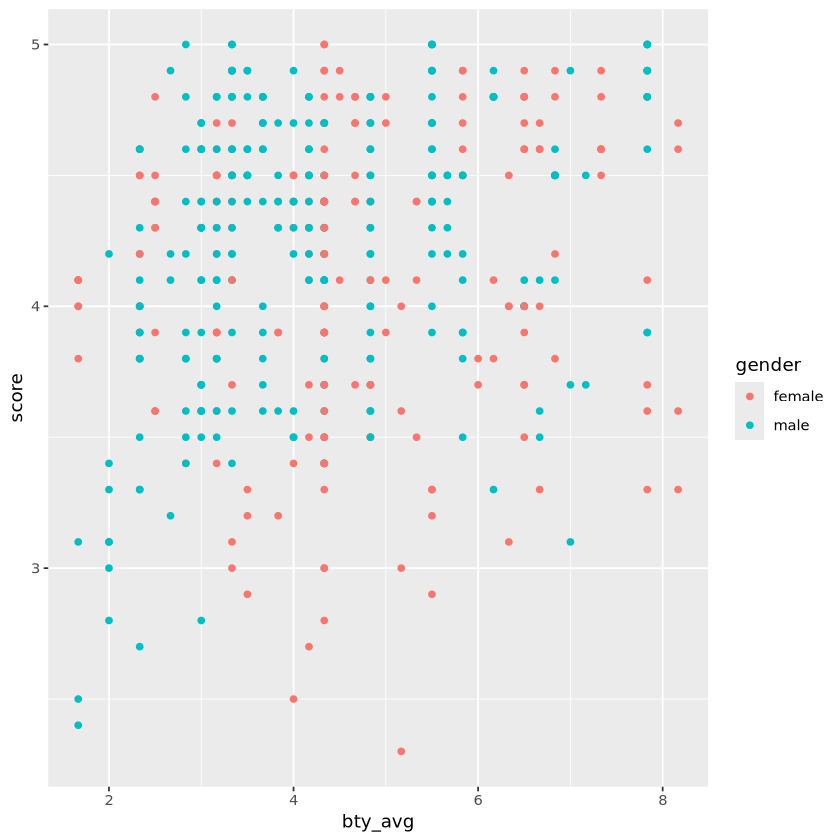

In [40]:
ggplot(evals_ch5, aes(x = bty_avg, y = score, color = gender)) +
    geom_point()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


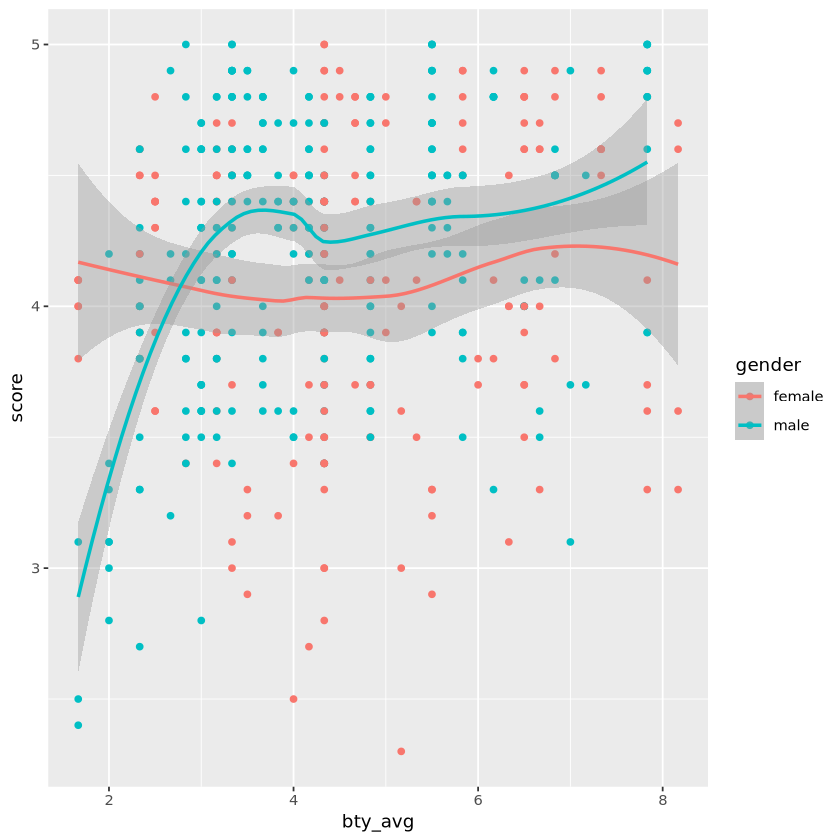

In [39]:
ggplot(evals_ch5, aes(x = bty_avg, y = score, color = gender)) +
    geom_point() + geom_smooth()

`geom_smooth()` using formula = 'y ~ x'


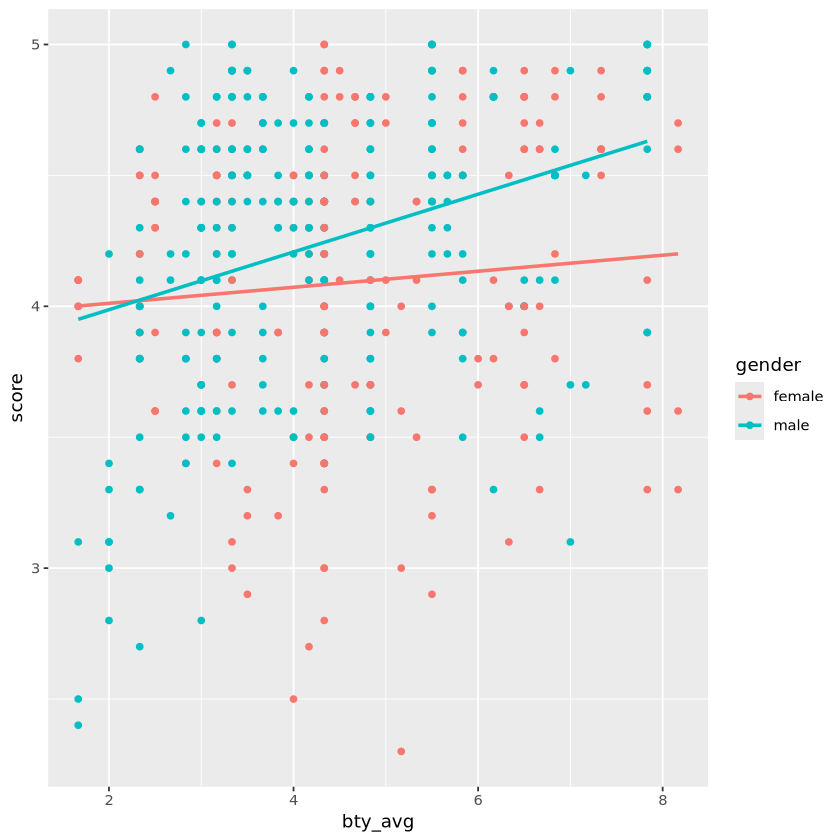

In [34]:
ggplot(evals_ch5, aes(x = bty_avg, y = score, color = gender)) +
    geom_point() + geom_smooth(method = 'lm', se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


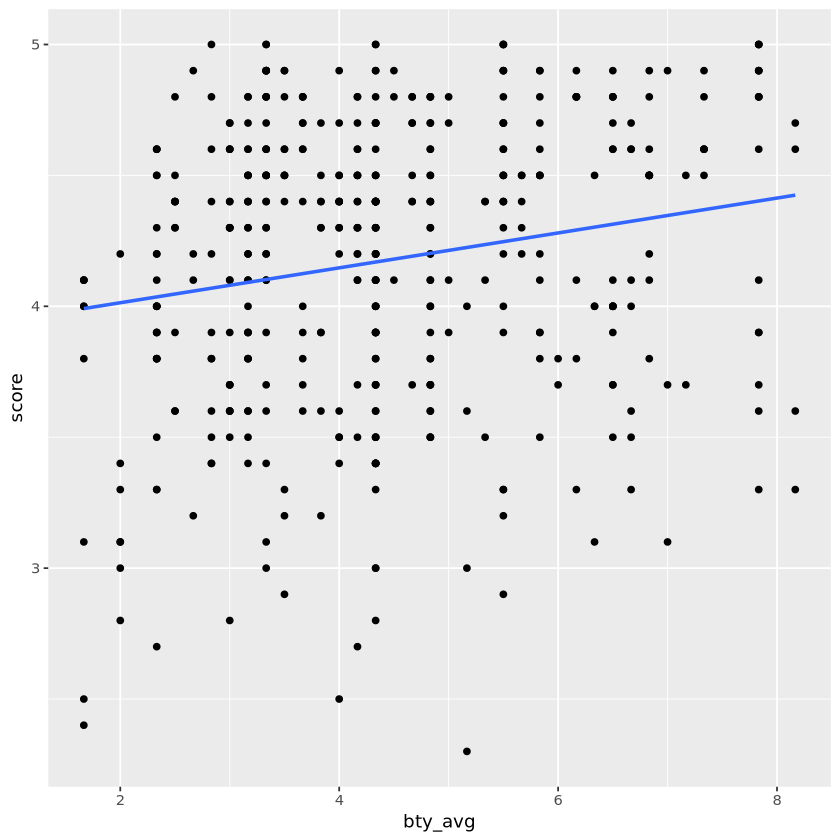

In [41]:
ggplot(evals_ch5, aes(x = bty_avg, y = score)) +
    geom_point() + geom_smooth(method = 'lm', se = FALSE)

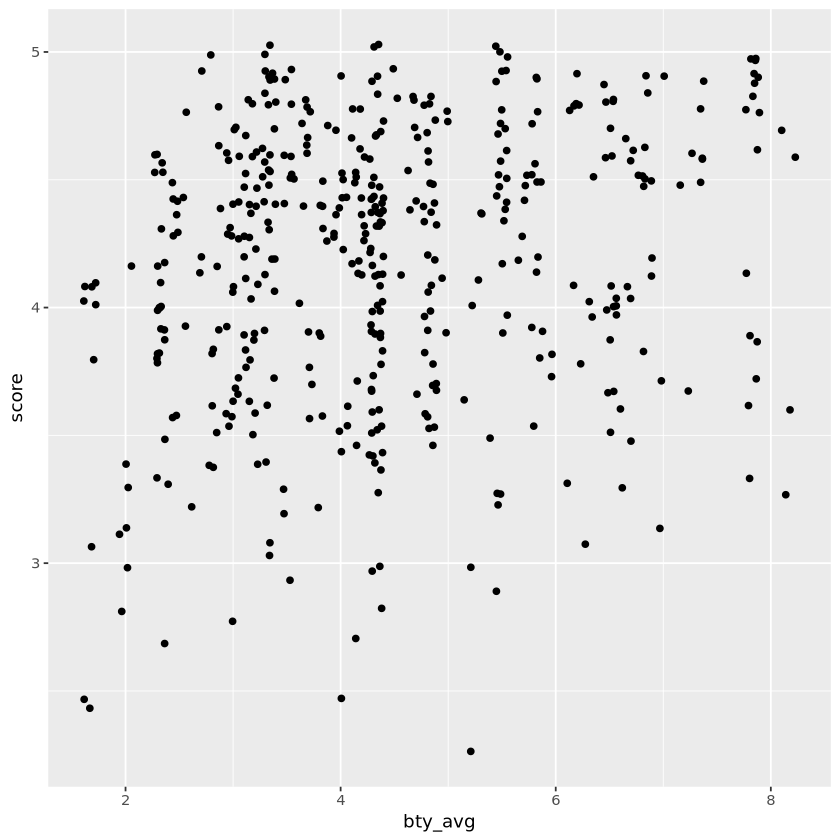

In [29]:
ggplot(evals_ch5, aes(x = bty_avg, y = score)) + geom_jitter()

In [43]:
score_model <- lm(score ~ bty_avg, data = evals_ch5)
get_regression_table(score_model)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,3.880,0.076,50.961,0,3.731,4.030
bty_avg,0.067,0.016,4.090,0,0.035,0.099


- Another way to do it using tidymodels

In [50]:
mod <- linear_reg() |> set_engine('lm')
mod_fit <- mod |> fit(score ~ bty_avg, data = evals_ch5)
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.88033795,0.07614297,50.961212,1.561043e-191
bty_avg,0.06663704,0.01629115,4.090382,5.082731e-05
